In [1]:
import sys
PATH_TO_ROOT='D:/My Repository'
sys.path.insert(0, PATH_TO_ROOT)

In [2]:
import pandas as pd
import numpy as np
from AlphaMobileSensing import Msenseing

In [22]:
datapath='D:/Research Working Folder/Paper_1-Mobile Sensing Virtual Environment/static_50cm_DEMO.csv'


env=Msenseing.AlphaMoSeEnv(datapath, 2000, 1, 10, (3, 5.5), 2, (0.5, 0.5), 500)

C:\Users\qizho\AppData\Roaming\Python\Python39\site-packages\gym\spaces\box.py:112: UserWarning: WARN: Box bound precision lowered by casting to float64
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [23]:
action_series_df=pd.read_excel('D:/Research Working Folder/Paper_1-Mobile Sensing Virtual Environment/action series for test.xlsx')

In [28]:
len(action_series_df)

42

In [181]:
env.reset()


measurement_log=np.zeros(((len(action_series_df)+1),4))
measurement_log[0,:]=env.obs[:]

for i in range(len(action_series_df)):
    env.step(action_series_df.iloc[i,:].values)
    measurement_log[i+1,:]=env.obs[:]


Episode: 9
Total moving distance (m)
204.0
Total moving time (s)
1390.0


In [94]:
data=pd.read_csv('D:/Research Working Folder/Paper_1-Mobile Sensing Virtual Environment/static_50cm_DEMO.csv')

In [182]:
x=measurement_log[0:41,1]
y=measurement_log[0:41,0]
z=measurement_log[0:41,3]
X = np.linspace(-0.5, 73.55,100)
Y = np.linspace(-3, 22.95,100)


from scipy.interpolate import SmoothBivariateSpline

outp=SmoothBivariateSpline(x=x, y=y, z=z, kx=3, ky=3)
Z=outp(X, Y)
X, Y = np.meshgrid(X, Y) 



c:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\fitpack2.py:1176: UserWarning: 
The required storage space exceeds the available storage space: nxest
or nyest too small, or s too small.
The weighted least-squares spline corresponds to the current set of
knots.
  warnings.warn(message)


In [183]:
delta=1.5

for i in range(100):
    for j in range(100):
        bb=np.array([X[0,i], Y[j,0]])
        judge_array=[0,0,0,0]
        window_data=data.loc[(data['Y']>(bb[0]-delta)) & (data['Y']<(bb[0]+delta)) & 
        (data['X']>(bb[1]-delta)) & (data['X']<(bb[1]+delta)), ['X', 'Y']]
        judge_array[0]=window_data.loc[(window_data['X']<bb[1]) & (window_data['Y']<bb[0])].empty
        judge_array[1]=window_data.loc[(window_data['X']<bb[1]) & (window_data['Y']>bb[0])].empty
        judge_array[2]=window_data.loc[(window_data['X']>bb[1]) & (window_data['Y']<bb[0])].empty
        judge_array[3]=window_data.loc[(window_data['X']>bb[1]) & (window_data['Y']>bb[0])].empty
        if True in judge_array:
            Z[j,i]=np.nan 

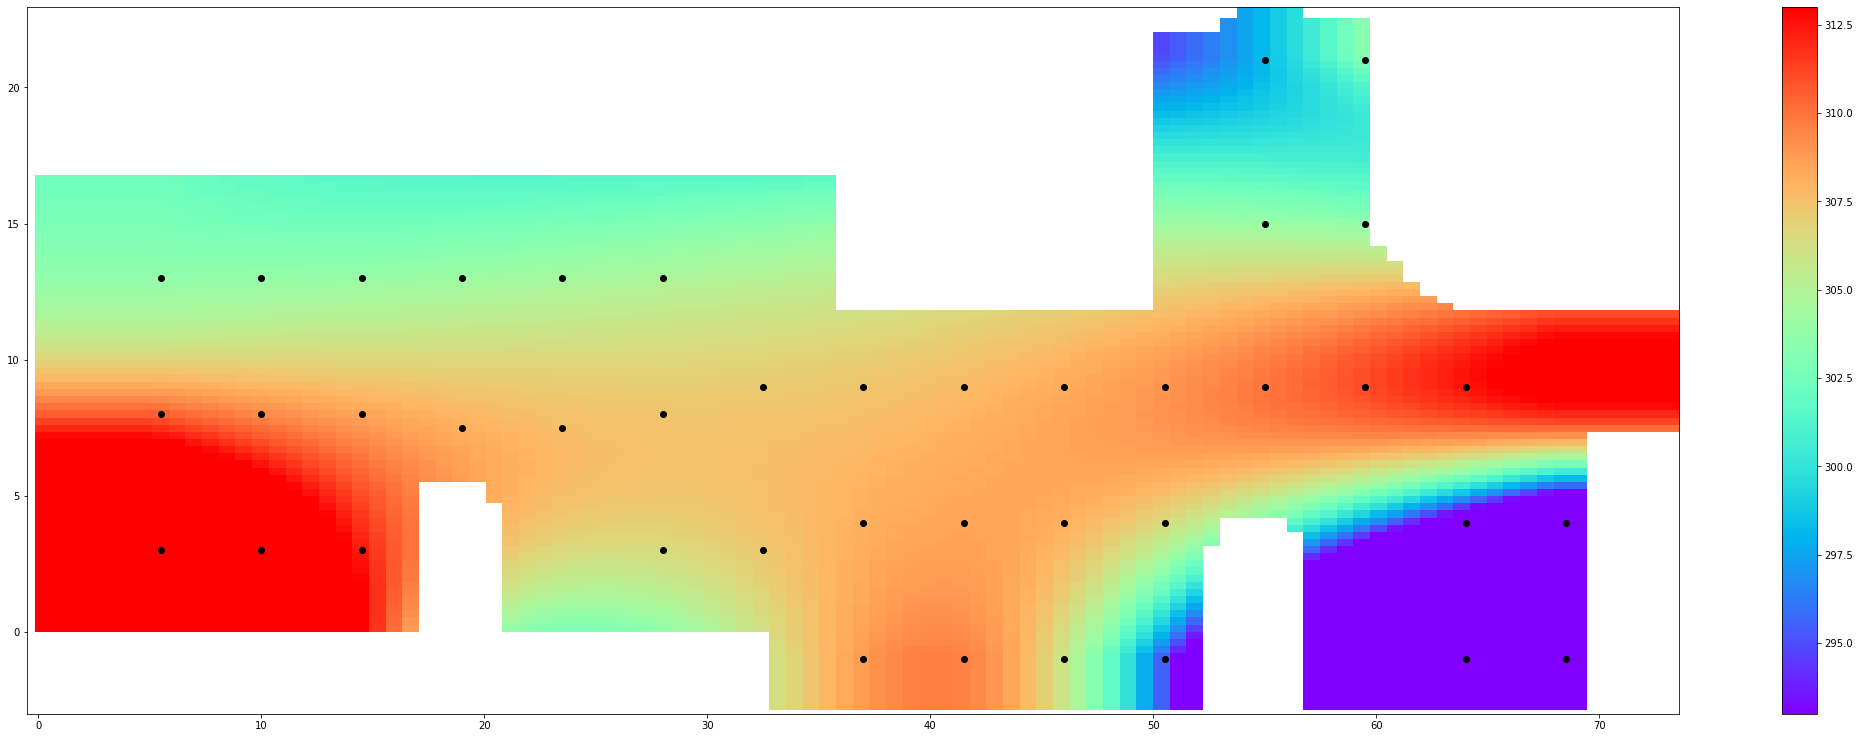

In [184]:
import matplotlib.pyplot as plt
plt.figure(figsize=(37,13))

plt.pcolormesh(X, Y, Z, shading='auto', cmap='rainbow')
plt.plot(x, y, "ok", label="input point")
plt.xlim(-0.5,73.55)
plt.ylim(-3,22.95)
plt.colorbar()
plt.clim(293,313)

In [185]:
x=measurement_log[0:41,1]
y=measurement_log[0:41,0]
z=measurement_log[0:41,3]

X = np.linspace(-0.5, 73.55,100)
Y = np.linspace(-3, 22.95,100)
X, Y = np.meshgrid(X, Y) 

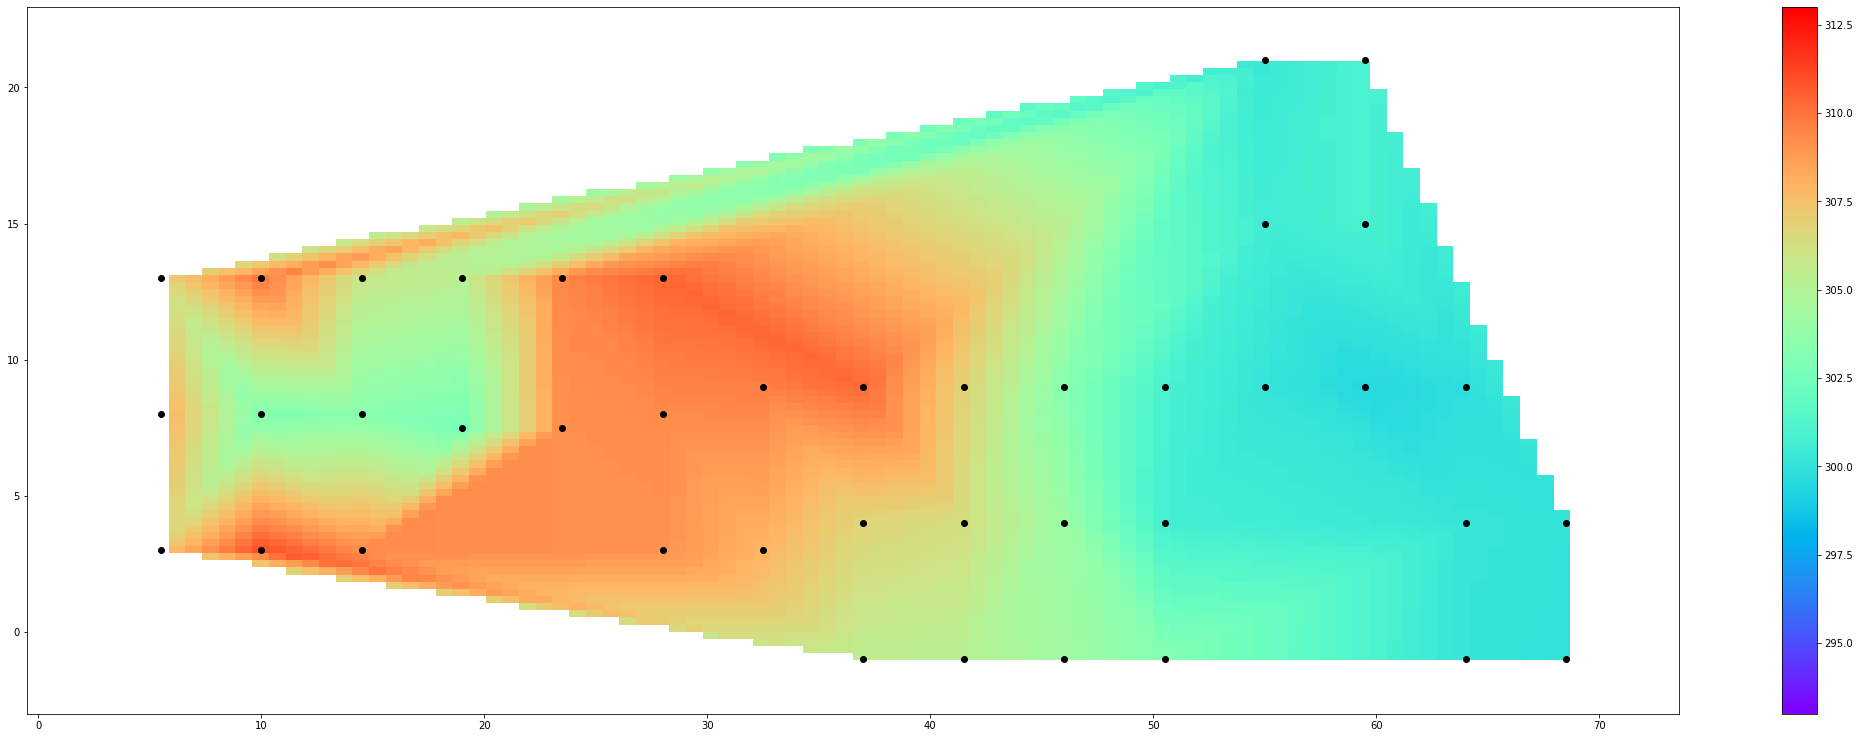

In [186]:
from scipy.interpolate import LinearNDInterpolator
import matplotlib.pyplot as plt
interp = LinearNDInterpolator(list(zip(x, y)), z)
Z = interp(X, Y)

plt.figure(figsize=(37,13))
plt.pcolormesh(X, Y, Z, shading='auto', cmap='rainbow')
plt.plot(x, y, "ok", label="input point")
plt.xlim(-0.5,73.55)
plt.ylim(-3,22.95)
plt.colorbar()
plt.clim(293,313)

In [145]:
from scipy.interpolate import SmoothBivariateSpline

outp=SmoothBivariateSpline(x=x, y=y, z=z, kx=3, ky=3)

c:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\fitpack2.py:1176: UserWarning: 
The required storage space exceeds the available storage space: nxest
or nyest too small, or s too small.
The weighted least-squares spline corresponds to the current set of
knots.
  warnings.warn(message)


In [152]:
X = np.linspace(-0.5, 73.55)
Y = np.linspace(-3, 22.95)
#X, Y = np.meshgrid(X, Y) 
Z=outp(X, Y)

In [128]:
X = np.linspace(-0.5, 73.55)
Y = np.linspace(-3, 22.95)
X, Y = np.meshgrid(X, Y) 

Z = interp(X, Y)

In [166]:
env.request_evauation_template()

In [167]:
template=pd.read_csv('D:/Research Working Folder/Paper_1-Mobile Sensing Virtual Environment/Template_1.csv')

In [168]:
X=template.iloc[:,2].values
Y=template.iloc[:,1].values
Z=outp(X, Y, grid=False, )

In [172]:
for i in range(25):
    template.iloc[i,3]=Z[i]

In [173]:
template.to_csv('D:/Research Working Folder/Paper_1-Mobile Sensing Virtual Environment/Template_1.csv')

In [174]:
env.compute_accuracy()

4.33995105970933

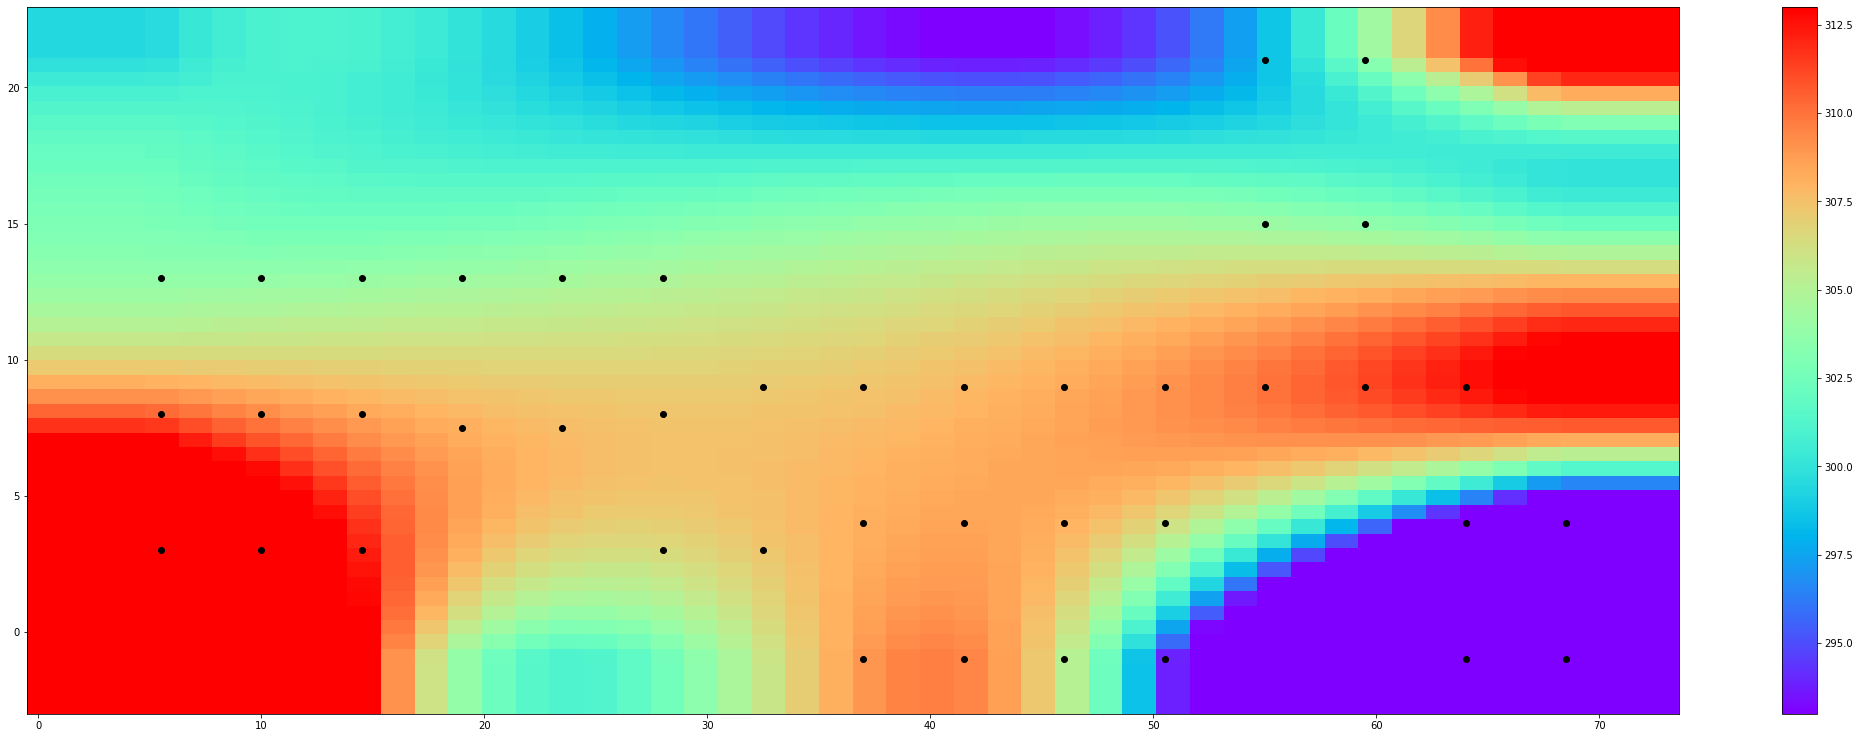

In [153]:
plt.figure(figsize=(37,13))
XX, YY = np.meshgrid(X, Y) 
plt.pcolormesh(XX, YY, Z, shading='auto', cmap='rainbow')
plt.plot(x, y, "ok", label="input point")
plt.xlim(-0.5,73.55)
plt.ylim(-3,22.95)
plt.colorbar()
plt.clim(293,313)

In [81]:
points=np.zeros((41,2))
points[:,0]=x 
points[:,1]=y 

In [123]:
from scipy.interpolate import griddata

grid_z0 = griddata(points, z, (X, Y), method='linear')

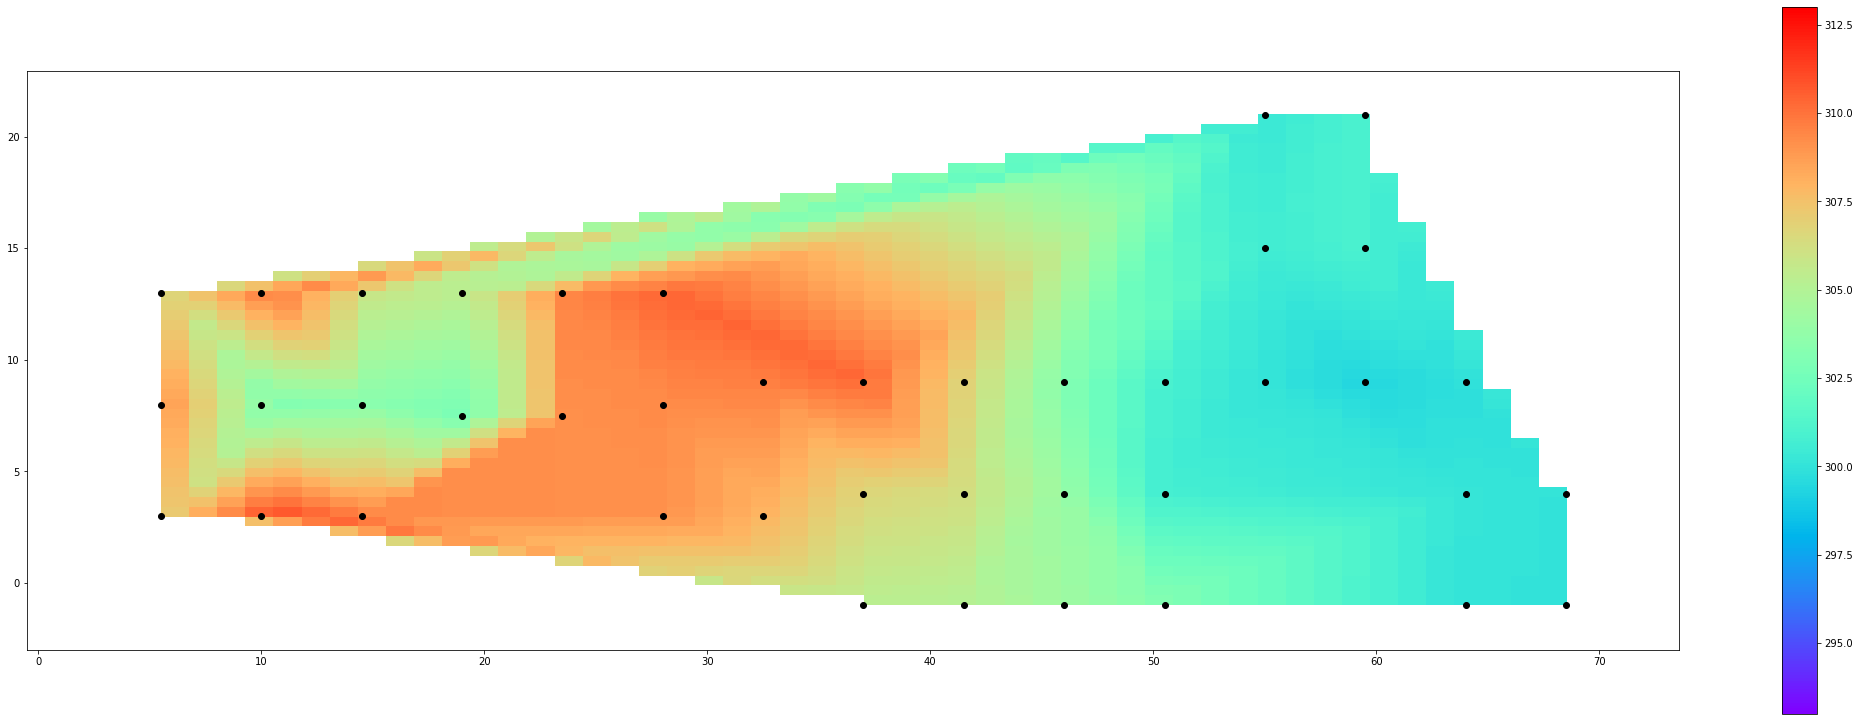

In [124]:
plt.figure(figsize=(37,13))
plt.imshow(grid_z0, extent=(5.5,68.5,-1,21),origin='lower', cmap='rainbow')
plt.plot(x, y, "ok", label="input point")
plt.xlim(-0.5,73.55)
plt.ylim(-3,22.95)
plt.colorbar()
plt.clim(293,313)

In [125]:
import turtle as t